In [1]:
"""
数据描述：
1. STY（Space Time Yield）: 甲醇产率，单位为 mgMeOH h-1 gcat-1。
2. Family: 催化剂的分类。
3. Metal Loading（wt.%）: 金属负载量，以重量百分比表示。
4. CR Metal (pm): 金属的粒径，单位为 pm（皮米）。
5. Support 1, Support 2, Support 3: 催化剂载体的名称和分子量（g mol-1）。
6. Total MW of Support: 总载体分子量。
7. Promoter 1, Promoter 2: 促进剂的名称和负载量。
8. Calcination Temperature (K): 焙烧温度。
9. Calcination duration (h): 焙烧持续时间。
10. SBET (m2 g-1): 比表面积。
11. H2/CO2 [-]: 氢气和二氧化碳的比例。
12. GHSV (cm3 h-1 gcat-1): 每小时气体通过催化剂的体积。
13. Pressure (Mpa): 压力。
14. Temperature (K): 反应温度。

这些数据可以用于分析催化剂的性能，以及不同成分和制备条件如何影响催化剂的活性和选择性。

文章描述：
这篇文章是发表在《Applied Catalysis B: Environmental》期刊上的一篇关于利用机器学习框架预测从热催化CO2加氢制甲醇的空间时间产率（STY）的研究。以下是文章的核心内容概要：

1. 研究背景：热催化CO2加氢制甲醇是一种有前景的脱碳技术，既能对抗气候变化，又能生产有价值的化学品和能源载体。然而，预测催化系统的性能一直是一个挑战。
2. 研究目的：开发一个机器学习框架，利用实验描述符来预测催化剂的性能。
3. 数据收集：作者从文献中收集了关于Cu-, Pd-, In2O3-, 和 ZnO-ZrO2基催化剂的数据，共1425个数据点，用于数据挖掘。
4. 模型开发：使用集成树模型（如随机森林、梯度提升决策树和极端梯度提升树）来预测甲醇的STY，从12个描述符中得出模型，揭示了空间速度、压力和金属含量的重要性。
5. 模型验证：通过实验验证了模型的预测和洞察力，实际和预测的甲醇STY之间的均方根误差为0.11 gMeOH h−1 gcat −1。
6. 框架特点：该框架是纯数据驱动的、可解释的、可跨过程部署的，并且作为指导实验和优化的宝贵工具。
7. 实验验证：通过60个实验来验证模型预测，这些实验涉及Cu-, In2O3-, 和 ZnO-ZrO2基催化剂在不同的反应条件下进行。
8. 结论：该研究展示了如何通过自上而下的方法在催化中采用数据驱动的方法，即仅从实验描述符中评估催化剂性能，可以在日常实验室工作中采用这些方法。
9. 数据和代码共享：为了支持开放获取、透明度和研究的可访问性，作者将数据集和机器学习模型免费提供给催化研究社区。
10. 未来工作：作者计划在当前研究中生成的实验数据集上包括催化剂的相关元素描述符，以及使用XGB模型作为贝叶斯优化器的替代品，以寻找最佳的化学空间和参数空间，以最大化甲醇STY。

Kath实验过程
1、描述性分析 ☑️
    对每个变量进行基本的统计描述，包括均值、中位数、标准差、最小值和最大值，以了解数据的分布情况。
2、相关性分析 ☑️
    使用皮尔逊相关系数（Pearson's correlation coefficient）来评估连续变量之间的线性关系。
    使用斯皮尔曼秩相关系数（Spearman's rank correlation coefficient）来评估非正态分布或有序分类变量之间的相关性。
3、回归分析 ☑️
    进行线性回归分析，以确定哪些变量是STY的显著预测因子。
    如果数据不符合正态分布，可以考虑使用非线性回归或转换变量。
    ！！！1)现有初步结果，但需要对数据进行中心化之后再判断各变量的 敏感性分析 和 生存分析。2)需要将分类变量加入 虚拟变量 多元回归。
    ！！！感觉现在还是不能最大最小中心化，应该按照均值方差归一化。
4、方差分析（ANOVA）
    对于分类变量，使用单因素方差分析来评估不同类别之间的STY是否存在显著差异。
5、多元回归分析 ☑️
    如果想同时考虑多个自变量对STY的影响，可以使用多元回归分析
    ！！！使用添加分类虚拟变量进行多元回归分析------代办
    基本可以判定对于STY（Space Time Yield）: 甲醇产率与SBET (m2 g-1): 比表面积、Pressure (Mpa): 压力、Calcination Temperature (K): 焙烧温度不显著线性相关；

6、主成分分析（PCA）☑️
    如果数据集中存在多重共线性，可以使用PCA来降低数据的维度。
    ！！！主成分分析后进一步使用 综合变量进行回归。
    主成分1:原料配比；主成分2:工艺条件；主成分3:催化剂组成
7、决策树和随机森林
    这些机器学习方法可以帮助识别影响STY的最重要变量，并提供变量之间的复杂交互作用的洞察。
    ？？？甲醇产率与每小时气体通过催化剂的体积之间的关系
    ？？？催化剂居然不是主要影响因素，每小时气体通过催化剂的体积才是？但是这个体积又跟什么密切相关呢？
    ？？？为什么决策树分析占主要贡献的因素，在主成分分析中却不存在。 ？？没有将数据进行中心化？-----代办中心化
8、生存分析 
    如果STY与时间相关，可以使用生存分析来评估不同变量对催化剂稳定性的影响。
9、敏感性分析  
    确定模型结果对每个变量的敏感性，了解哪些变量对STY的影响最大。
    ！！！同样条件 不同时间
10、模型验证
    使用交叉验证或留出法来验证你的模型的预测能力。
    
目的：
    识别出对STY影响最大的变量----自变量对因变量的影响趋势，正相关？负相关？先正后负？先负后正？，如果是U型的话，最大值/最小值在哪
    理解变量之间的相互作用
    建立预测模型，估计在不同条件下的STY
    提供关于如何优化催化剂性能的建议----创新点：加入经济效应成分？？
    
    
    
    
进一步实验：
    1）‘Family’中的Zno删除/数据处理；
    2）‘Family’的Cu和In2O3一起做
    3）？？催化剂、促进剂和负载剂是加的种类越多越好吗？----我觉得只有第一个有大用
    4）把‘Family’和‘Support 1’'Promoter 1'放在一起分析
    5）把分类物质以物理描述符的形式展开----为了预测更优催化剂的种类
    6）用“total_data_for_..”数据继续整理丰富现有数据。劣势：没有物质含量。
    7）各种方法组合一下
    8）去计算机领域找点小数据量的预测方式
    
    
"""

"\n1、描述性分析\n    对每个变量进行基本的统计描述，包括均值、中位数、标准差、最小值和最大值，以了解数据的分布情况。\n2、相关性分析\n    使用皮尔逊相关系数（Pearson's correlation coefficient）来评估连续变量之间的线性关系。\n    使用斯皮尔曼秩相关系数（Spearman's rank correlation coefficient）来评估非正态分布或有序分类变量之间的相关性。\n3、回归分析\n    进行线性回归分析，以确定哪些变量是STY的显著预测因子。\n    如果数据不符合正态分布，可以考虑使用非线性回归或转换变量。\n4、方差分析（ANOVA）\n    对于分类变量，使用单因素方差分析来评估不同类别之间的STY是否存在显著差异。\n5、多元回归分析\n    如果想同时考虑多个自变量对STY的影响，可以使用多元回归分析\n6、主成分分析（PCA）\n    如果数据集中存在多重共线性，可以使用PCA来降低数据的维度。\n7、决策树和随机森林\n    这些机器学习方法可以帮助识别影响STY的最重要变量，并提供变量之间的复杂交互作用的洞察。\n8、生存分析\n"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import openpyxl



In [2]:
# 加载数据
file_path = '1_Curated_data_1234_datapoints.csv'

In [3]:
# 使用pandas读取Excel文件
df = df = pd.read_csv(file_path)


In [4]:
# 查看数据框架的前几行
print(df.head())


   STY [mgMeOH h-1 gcat-1] Family  Metal Loading [wt.%]  CR Metal [pm]  \
0                   2620.0  In2O3                   4.4            144   
1                   2400.0  In2O3                   4.4            144   
2                   2233.6     Cu                  36.5            138   
3                   2230.0  In2O3                   4.4            144   
4                   2224.0     Cu                  36.5            138   

  Support 1  MW Support 1 [g mol-1] Name of Support2  \
0     Fe3O4                  159.69                0   
1     Fe3O4                  159.69                0   
2       ZnO                   81.38                0   
3     Fe3O4                  159.69                0   
4       ZnO                   81.38           SBA-15   

   MW of Support 2 [g mol-1] Name of Support 3  MW Support 3 [g mol-1]  ...  \
0                        0.0                 0                     0.0  ...   
1                        0.0                 0              

In [5]:
# 查看数据的基本统计信息
print(df.describe())

       STY [mgMeOH h-1 gcat-1]  Metal Loading [wt.%]  CR Metal [pm]  \
count              1234.000000           1234.000000    1234.000000   
mean                193.316572             38.224871     138.846029   
std                 285.369706             34.905878       3.795112   
min                   0.740000              0.000000     131.000000   
25%                  37.330000              9.000000     138.000000   
50%                  98.130000             24.000000     138.000000   
75%                 240.270000             58.100000     144.000000   
max                2620.000000            100.000000     144.000000   

       MW Support 1 [g mol-1]  MW of Support 2 [g mol-1]  \
count             1234.000000                1234.000000   
mean                80.072528                  30.199984   
std                 56.982794                  50.572704   
min                  0.000000                   0.000000   
25%                 60.000000                   0.000000   


In [6]:
# 查看数据类型和缺失值
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   STY [mgMeOH h-1 gcat-1]        1234 non-null   float64
 1   Family                         1234 non-null   object 
 2   Metal Loading [wt.%]           1234 non-null   float64
 3   CR Metal [pm]                  1234 non-null   int64  
 4   Support 1                      1234 non-null   object 
 5   MW Support 1 [g mol-1]         1234 non-null   float64
 6   Name of Support2               1234 non-null   object 
 7   MW of Support 2 [g mol-1]      1234 non-null   float64
 8   Name of Support 3              1234 non-null   object 
 9   MW Support 3 [g mol-1]         1234 non-null   float64
 10  Total MW of Support [g mol-1]  1234 non-null   float64
 11  Promoter 1                     1234 non-null   object 
 12  Promoter 1 loading [wt.%]      1234 non-null   f

In [8]:
import pandas as pd
import numpy as np

# 假设df是你的DataFrame
# 使用apply函数对所有数值型列进行最小-最大归一化
df_normalized = df.select_dtypes(include=[np.number]).apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
# 将归一化后的DataFrame重新赋值给df或者创建一个新的DataFrame
df[df_normalized.columns] = df_normalized
print(df_normalized)

      STY [mgMeOH h-1 gcat-1]  Metal Loading [wt.%]  CR Metal [pm]  \
0                    1.000000                 0.044       1.000000   
1                    0.916007                 0.044       1.000000   
2                    0.852477                 0.365       0.538462   
3                    0.851103                 0.044       1.000000   
4                    0.848812                 0.365       0.538462   
...                       ...                   ...            ...   
1229                 0.145713                 0.670       0.538462   
1230                 0.338439                 0.670       0.538462   
1231                 0.426937                 0.670       0.538462   
1232                 0.167704                 0.670       0.538462   
1233                 0.011553                 1.000       0.692308   

      MW Support 1 [g mol-1]  MW of Support 2 [g mol-1]  \
0                   0.575169                   0.000000   
1                   0.575169             

In [10]:
import pandas as pd
import numpy as np

# 假设df是你的原始DataFrame

# 选择所有数值型的列
numeric_columns = df.select_dtypes(include=[np.number]).columns

# 对数值型列进行最小-最大归一化
normalized_data = {col: (df[col] - df[col].min()) / (df[col].max() - df[col].min()) for col in numeric_columns}

# 使用归一化的数据创建一个新的DataFrame
df_normalized = pd.DataFrame(normalized_data, index=df.index)

# 将新的DataFrame输出为CSV文件
df_normalized.to_csv('normalized_data.csv', index=False)

# index=False 参数表示在输出的CSV文件中不包含行索引

In [19]:
import pandas as pd
import numpy as np


# 创建虚拟变量/哑变量
df = pd.get_dummies(df, columns=['Family','Support 1','Name of Support2','Name of Support 3','Promoter 1','Promoter 2'], drop_first=True)

# 保存修改后的DataFrame以供后续分析
df.to_csv('Processed_data_1.csv', index=False)

In [16]:
print(df.columns)

Index(['STY [mgMeOH h-1 gcat-1]', 'Family', 'Metal Loading [wt.%]',
       'CR Metal [pm]', 'Support 1', 'MW Support 1 [g mol-1]',
       'Name of Support2', 'MW of Support 2 [g mol-1]', 'Name of Support 3',
       'MW Support 3 [g mol-1]', 'Total MW of Support [g mol-1]', 'Promoter 1',
       'Promoter 1 loading [wt.%]', 'Promoter 2', 'Promoter 2 loading [wt.%]',
       'Calcination Temperature [K]', 'Calcination duration [h]',
       'SBET [m2 g-1]', 'H2/CO2 [-]', 'GHSV [cm3 h-1 gcat-1]',
       'Pressure [Mpa]', 'Temperature [K]'],
      dtype='object')


In [17]:
#数据类型转换:将分类变量转换为适当的数据类型，例如使用category类型
df['Family'] = df['Family'].astype('category')
df['Support 1'] = df['Support 1'].astype('category')
df['Name of Support2'] = df['Name of Support2'].astype('category')
df['Name of Support 3'] = df['Name of Support 3'].astype('category')
df['Promoter 1'] = df['Promoter 1'].astype('category')
df['Promoter 2'] = df['Promoter 2'].astype('category')

#保存修改后的DataFrame以供后续分析
df.to_csv('Processed_data_2.csv', index=False)

In [20]:
import pandas as pd
# 选择数值列
numeric_columns = df.select_dtypes(include=[np.number]).columns

# 计算数值列之间的皮尔逊相关系数
correlation_matrix = df[numeric_columns].corr()

# 打印STY与其他数值变量之间的相关系数，按相关系数的绝对值排序
print(correlation_matrix['STY [mgMeOH h-1 gcat-1]'].sort_values(ascending=False))

STY [mgMeOH h-1 gcat-1]          1.000000
GHSV [cm3 h-1 gcat-1]            0.671663
H2/CO2 [-]                       0.232612
CR Metal [pm]                    0.178070
Temperature [K]                  0.172109
Metal Loading [wt.%]             0.141154
Promoter 1 loading [wt.%]        0.108444
MW of Support 2 [g mol-1]        0.056737
Pressure [Mpa]                   0.016941
SBET [m2 g-1]                   -0.018142
MW Support 3 [g mol-1]          -0.021490
MW Support 1 [g mol-1]          -0.026629
Calcination Temperature [K]     -0.038008
Total MW of Support [g mol-1]   -0.045593
Promoter 2 loading [wt.%]       -0.074099
Calcination duration [h]        -0.094381
Name: STY [mgMeOH h-1 gcat-1], dtype: float64


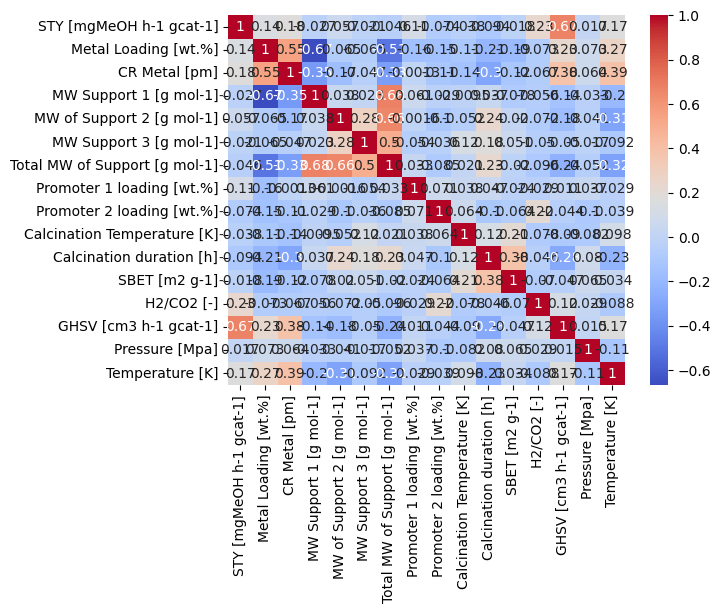

In [21]:
# 使用seaborn绘制热图来查看变量之间的相关性
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

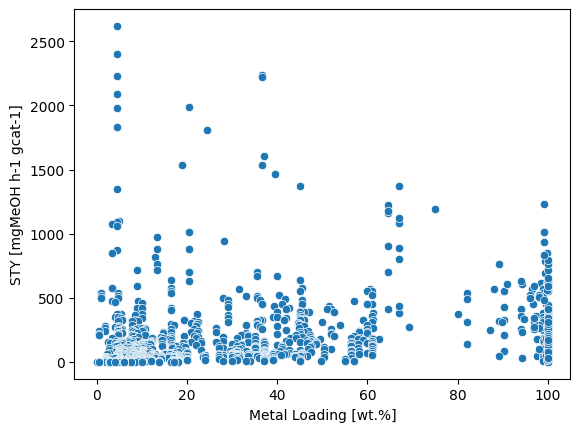

In [7]:
# 想进一步分析某个特定变量与STY的关系，可以使用seaborn的散点图或箱线图
# 例如，绘制金属负载量 (Metal Loading) 与STY的关系
sns.scatterplot(x='Metal Loading [wt.%]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()


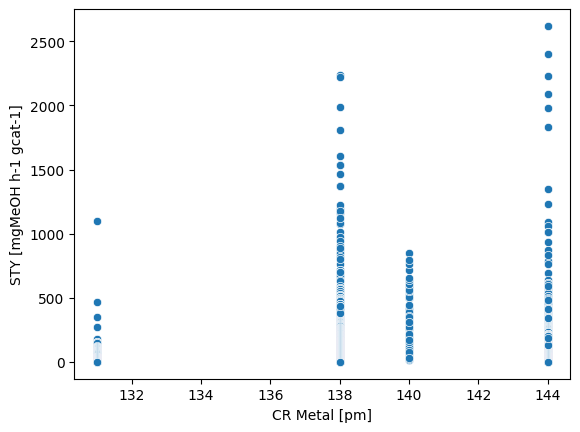

In [8]:

sns.scatterplot(x='CR Metal [pm]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

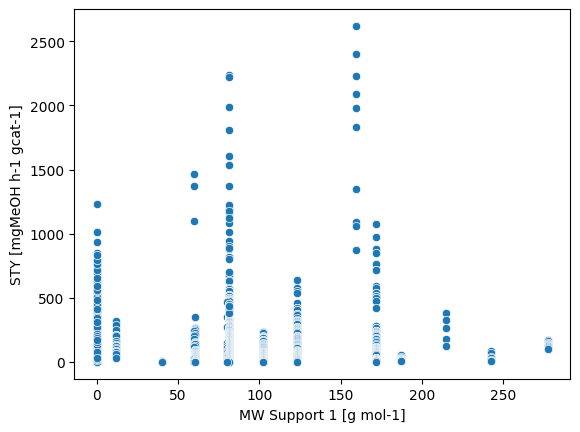

In [9]:

sns.scatterplot(x='MW Support 1 [g mol-1]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

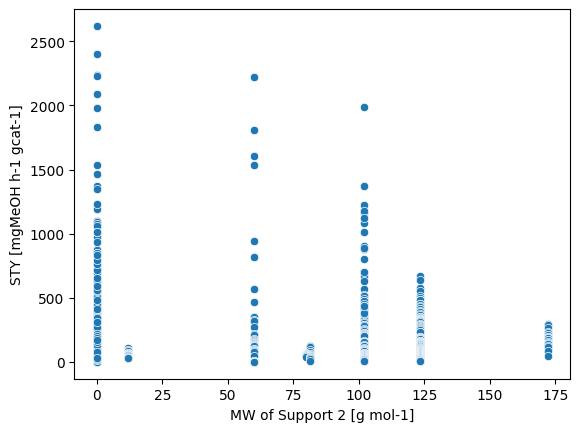

In [10]:

sns.scatterplot(x='MW of Support 2 [g mol-1]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

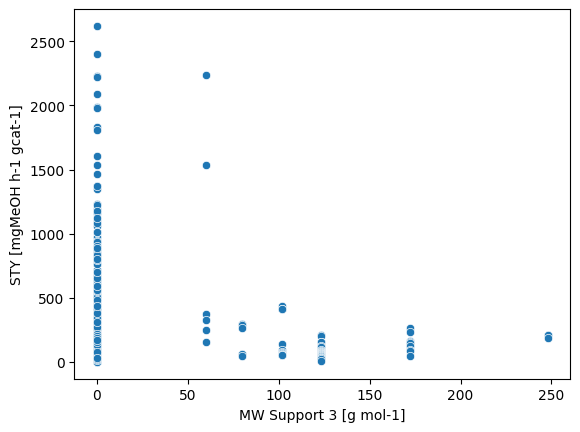

In [11]:

sns.scatterplot(x='MW Support 3 [g mol-1]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

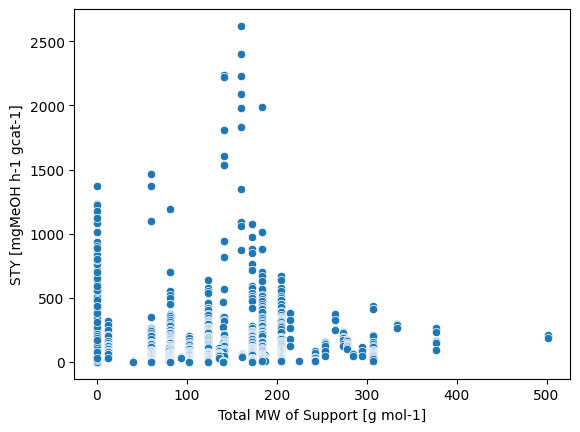

In [12]:

sns.scatterplot(x='Total MW of Support [g mol-1]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

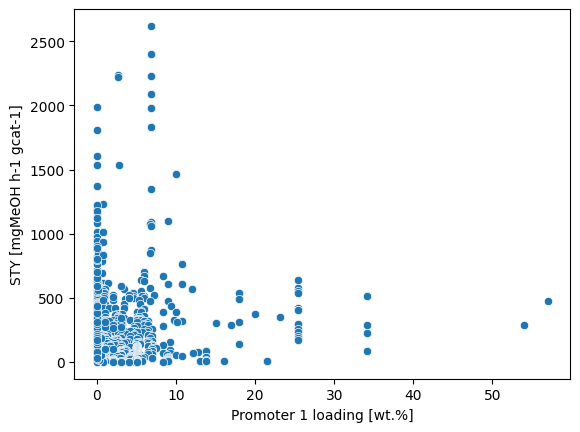

In [13]:

sns.scatterplot(x='Promoter 1 loading [wt.%]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

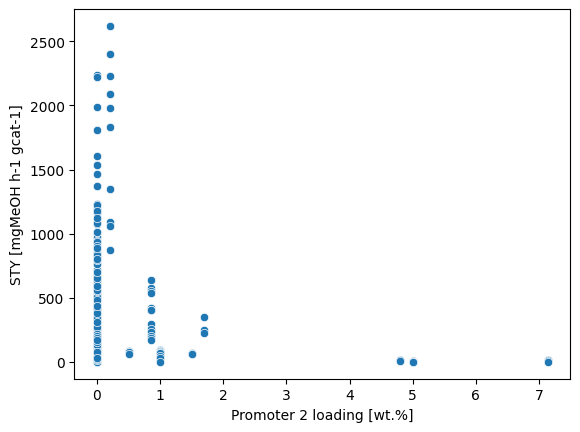

In [14]:
sns.scatterplot(x='Promoter 2 loading [wt.%]', y='7STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

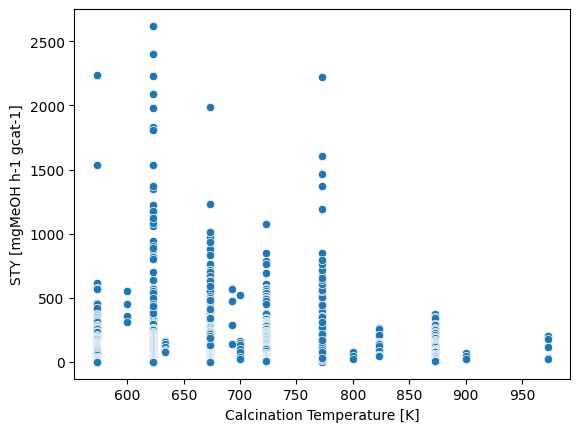

In [15]:
sns.scatterplot(x='Calcination Temperature [K]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

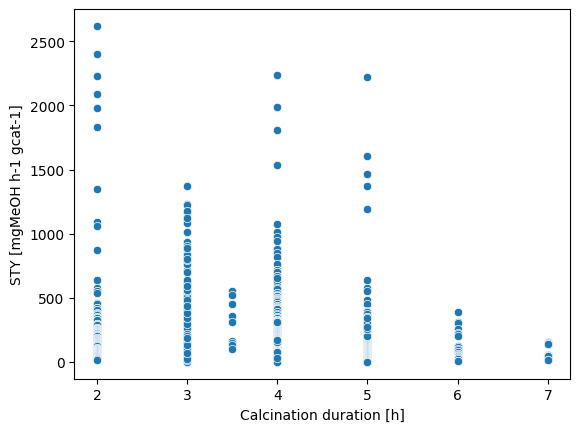

In [16]:
sns.scatterplot(x='Calcination duration [h]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

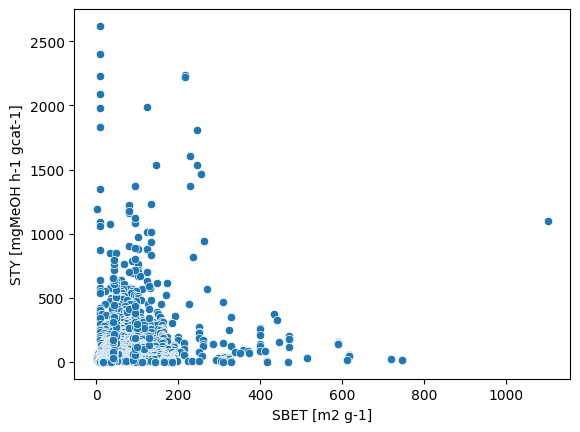

In [17]:
sns.scatterplot(x='SBET [m2 g-1]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

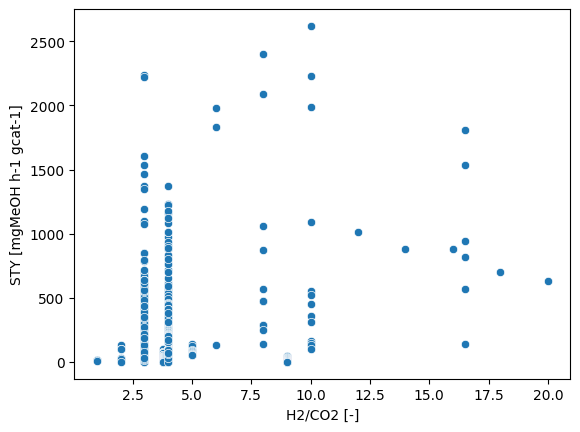

In [18]:
sns.scatterplot(x='H2/CO2 [-]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

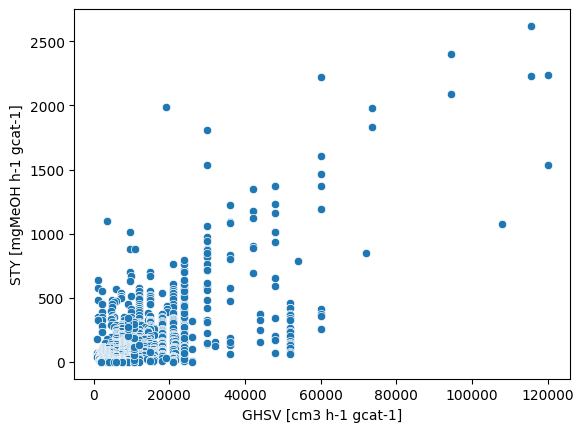

In [19]:
sns.scatterplot(x='GHSV [cm3 h-1 gcat-1]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

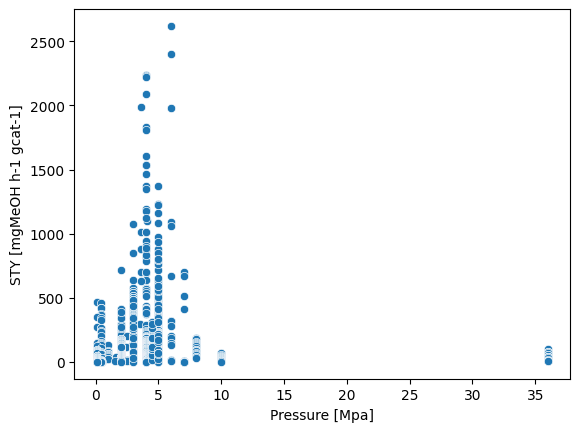

In [20]:
sns.scatterplot(x='Pressure [Mpa]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

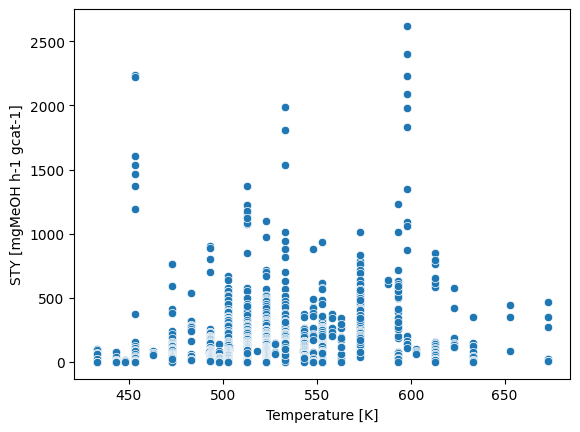

In [21]:
sns.scatterplot(x='Temperature [K]', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

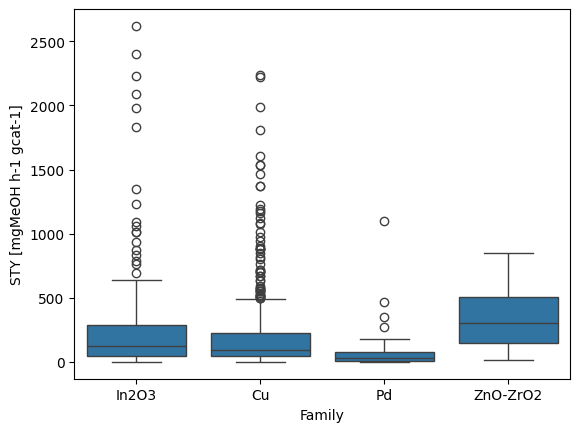

In [27]:
# 或者，绘制不同催化剂家族 (Family) 的STY分布
sns.boxplot(x='Family', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

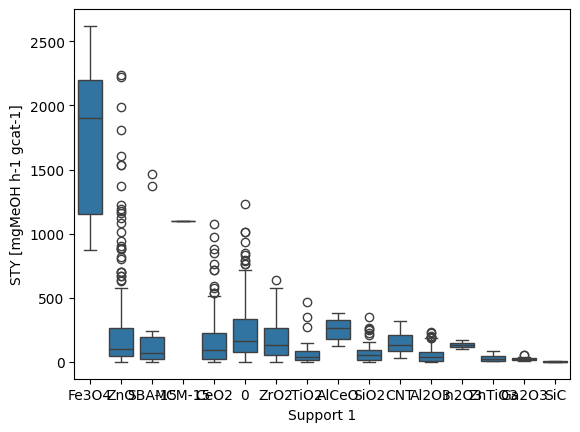

In [22]:
# 或者，绘制不同催化剂家族 (Family) 的STY分布
sns.boxplot(x='Support 1', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

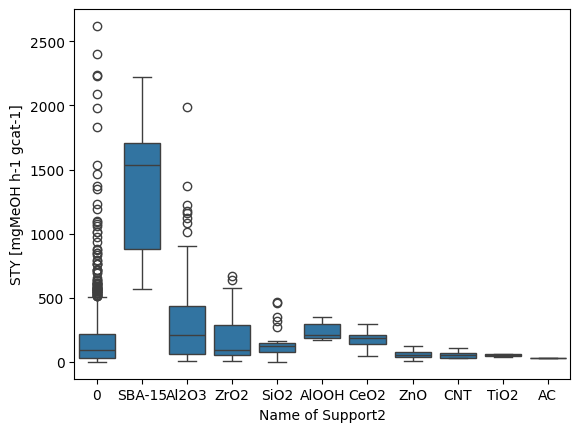

In [23]:
# 或者，绘制不同催化剂家族 (Family) 的STY分布
sns.boxplot(x='Name of Support2', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

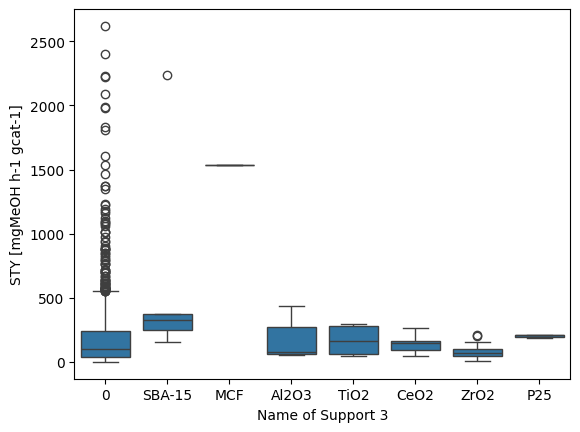

In [24]:
# 或者，绘制不同催化剂家族 (Family) 的STY分布
sns.boxplot(x='Name of Support 3', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

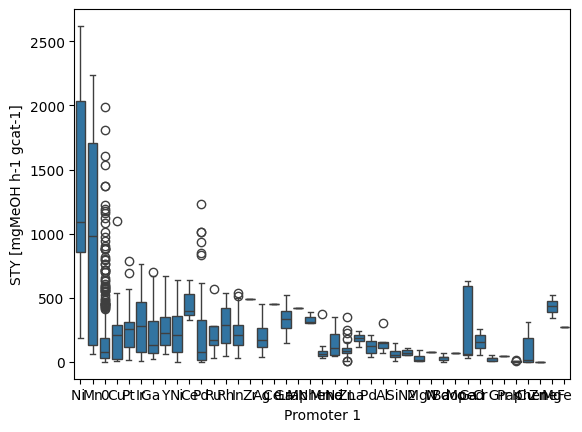

In [25]:
# 或者，绘制不同催化剂家族 (Family) 的STY分布
sns.boxplot(x='Promoter 1', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

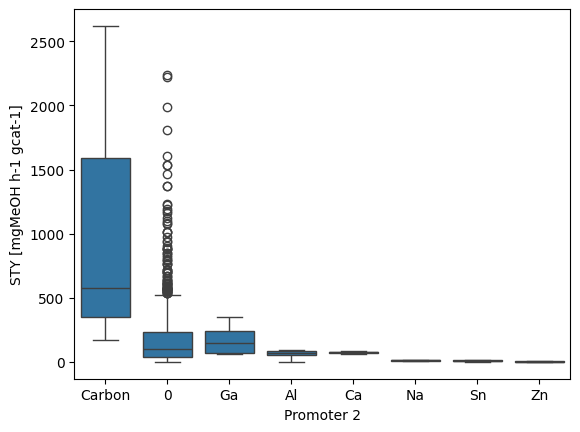

In [26]:
# 或者，绘制不同催化剂家族 (Family) 的STY分布
sns.boxplot(x='Promoter 2', y='STY [mgMeOH h-1 gcat-1]', data=df)
plt.show()

In [28]:
#3、回归分析
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [42]:
# 选择数值列作为自变量，STY作为因变量
X = df.select_dtypes(include=[np.number]).drop(['STY [mgMeOH h-1 gcat-1]'], axis=1)
y = df['STY [mgMeOH h-1 gcat-1]']


In [43]:
# 将分类变量转换为虚拟变量
X = pd.get_dummies(X)


In [31]:
# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# 创建线性回归模型
model = LinearRegression()


In [33]:
print(df.isnull().sum())

STY [mgMeOH h-1 gcat-1]          0
Family                           0
Metal Loading [wt.%]             0
CR Metal [pm]                    0
Support 1                        0
MW Support 1 [g mol-1]           0
Name of Support2                 0
MW of Support 2 [g mol-1]        0
Name of Support 3                0
MW Support 3 [g mol-1]           0
Total MW of Support [g mol-1]    0
Promoter 1                       0
Promoter 1 loading [wt.%]        0
Promoter 2                       0
Promoter 2 loading [wt.%]        0
Calcination Temperature [K]      0
Calcination duration [h]         0
SBET [m2 g-1]                    0
H2/CO2 [-]                       0
GHSV [cm3 h-1 gcat-1]            0
Pressure [Mpa]                   0
Temperature [K]                  0
dtype: int64


In [34]:
# 拟合模型
#Catalyst amount [g]有缺失值值，且跟洪商量过可删除
model.fit(X_train, y_train)


LinearRegression()

In [35]:
# 预测测试集
y_pred = model.predict(X_test)


In [36]:
# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 26641.433923449382


In [37]:
# 查看回归系数
print(f'Regression Coefficients: {model.coef_}')

Regression Coefficients: [ 1.21085719e+00 -8.47965796e+00  3.02719238e+00  3.39900810e+00
  1.90382237e+00 -2.13748825e+00  7.11507299e+00 -1.90166208e+01
  9.00946418e-02  2.21355081e+01  4.13761262e-02  3.55051638e+01
  1.45885760e-02  1.26050599e+00  1.42360557e+00]


In [44]:
# 决定系数R²
r_squared = model.score(X, y)

print(f"决定系数R²: {r_squared}")



决定系数R²: 0.5883624764252291


In [47]:
#用statsmodels重新做一遍
import numpy as np
import pandas as pd
import statsmodels.api as sm
# 选择数值列作为自变量，STY作为因变量
X = df.select_dtypes(include=[np.number]).drop(['STY [mgMeOH h-1 gcat-1]'], axis=1)
y = df['STY [mgMeOH h-1 gcat-1]']

In [48]:
#在多元回归分析中，通常需要添加一个常数项（截距项）：
X = sm.add_constant(X)  # statsmodels会自动处理常数项

In [49]:
model = sm.OLS(y, X).fit()  # 使用 OLS 方法拟合模型

In [50]:
print(model.summary())
#可以从下面看出Promoter 2 loading [wt.%]、Calcination Temperature [K]、SBET [m2 g-1]、Pressure [Mpa]不通过显著性检验，
#尝试逐步删除

                               OLS Regression Results                              
Dep. Variable:     STY [mgMeOH h-1 gcat-1]   R-squared:                       0.591
Model:                                 OLS   Adj. R-squared:                  0.585
Method:                      Least Squares   F-statistic:                     117.1
Date:                     Sun, 05 May 2024   Prob (F-statistic):          1.60e-223
Time:                             09:07:16   Log-Likelihood:                -8176.3
No. Observations:                     1234   AIC:                         1.638e+04
Df Residuals:                         1218   BIC:                         1.647e+04
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

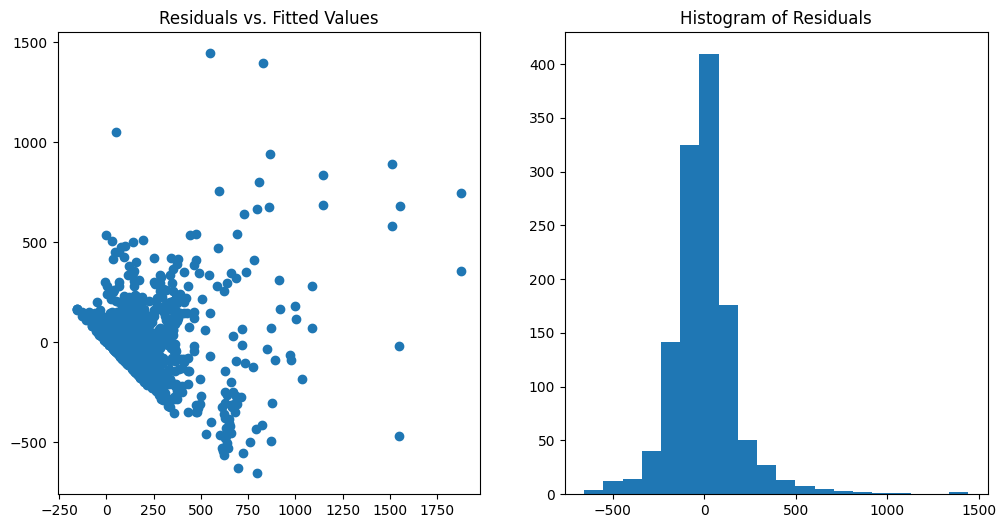

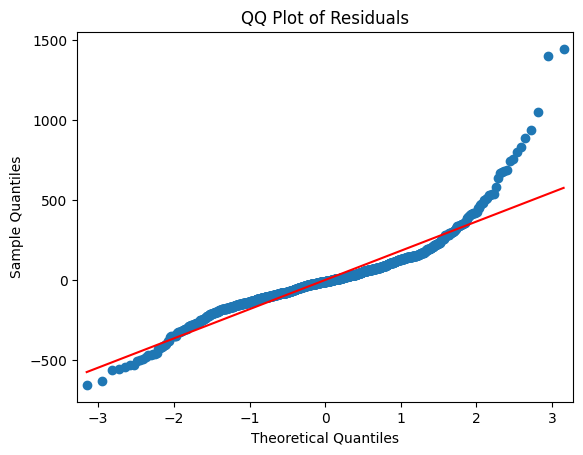

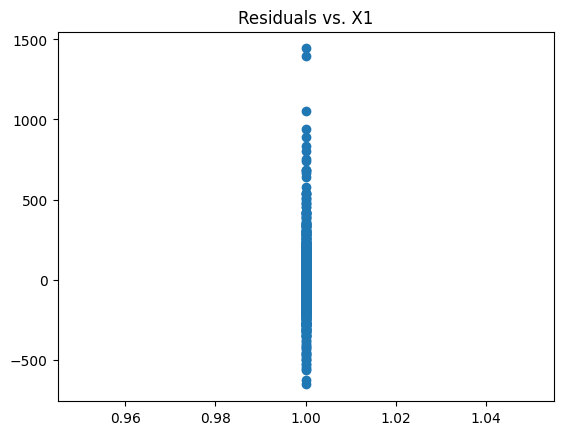

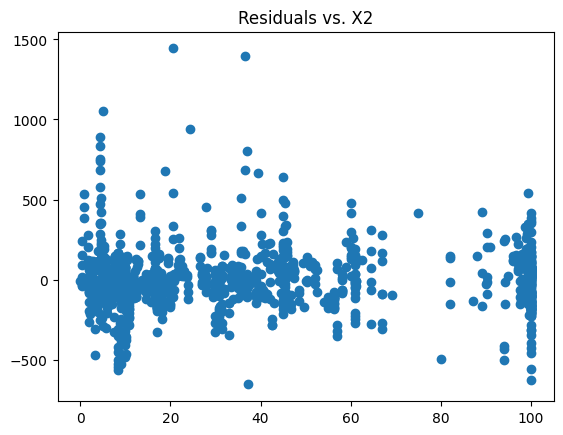

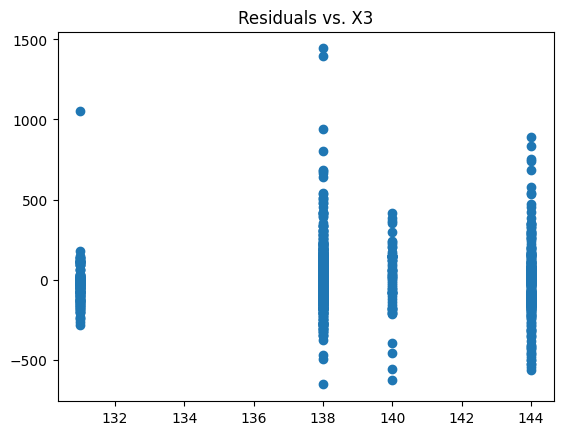

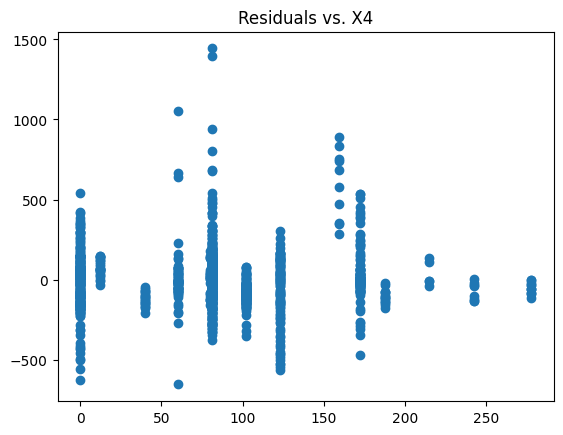

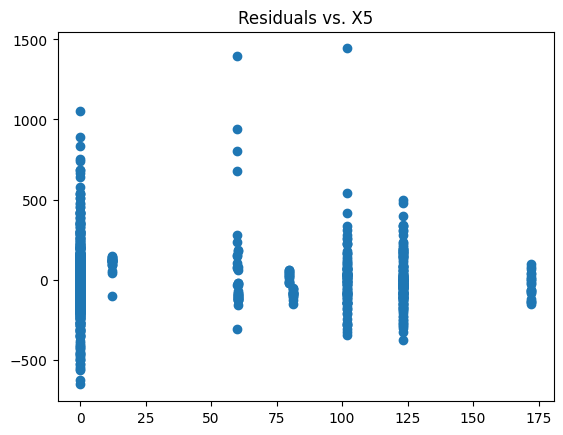

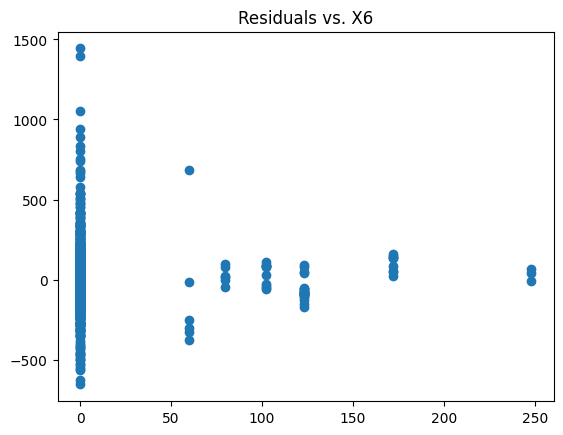

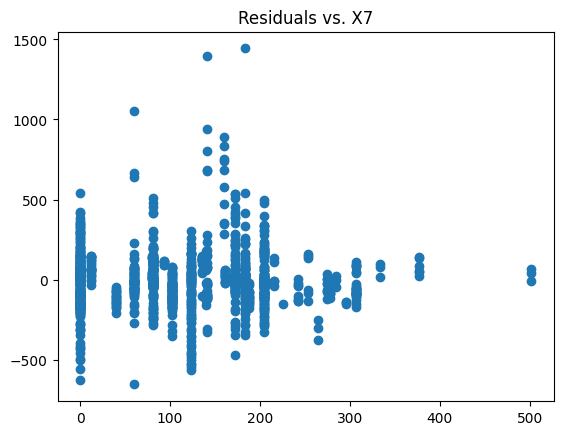

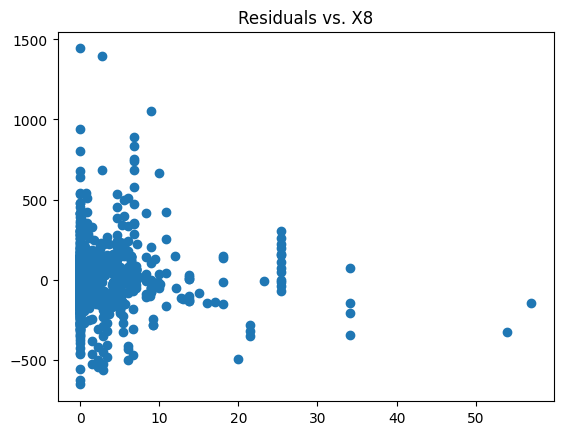

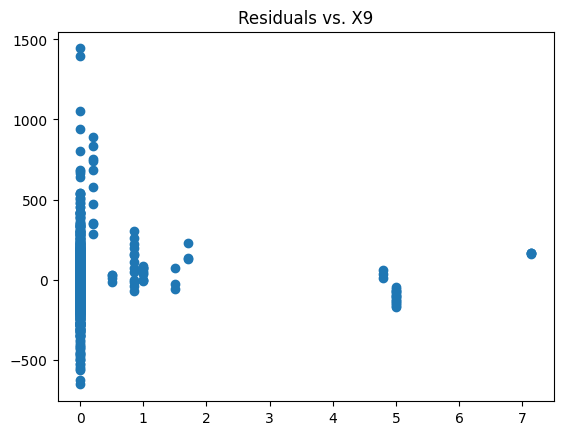

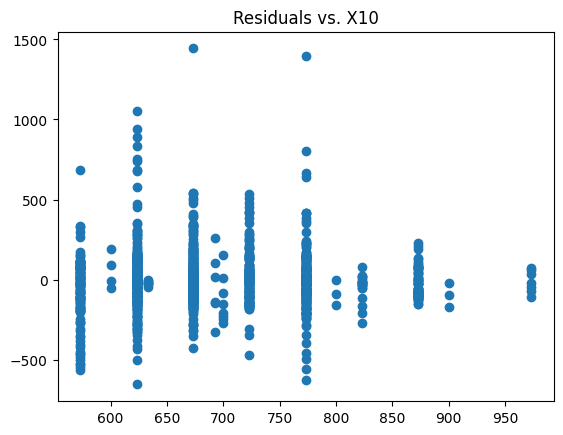

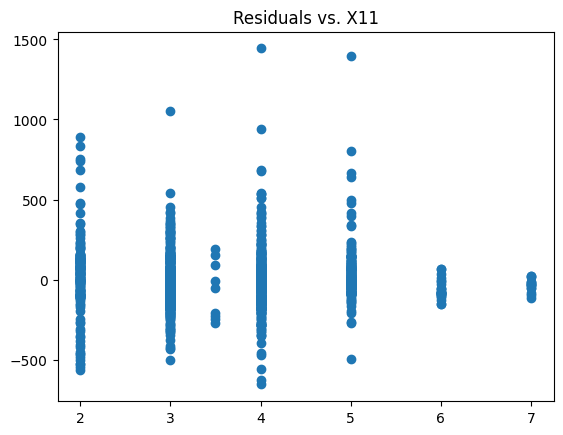

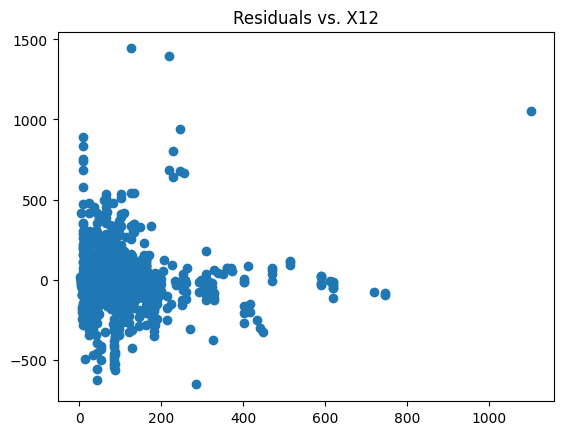

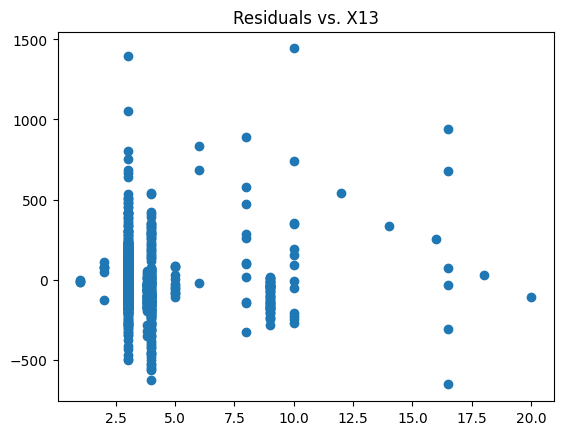

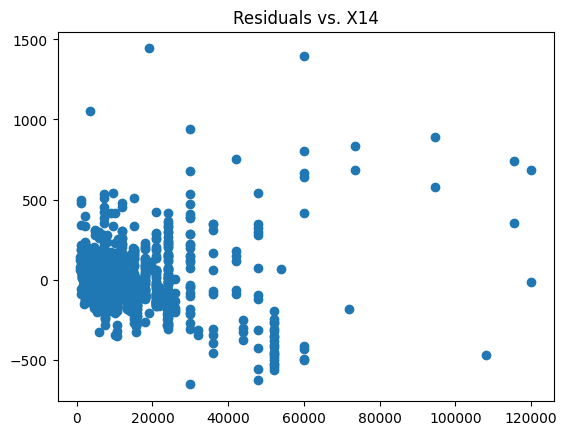

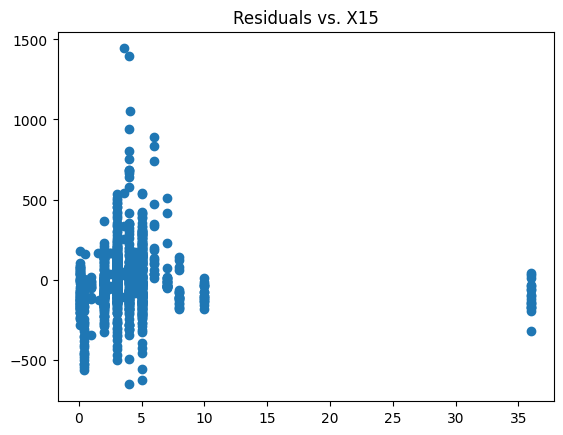

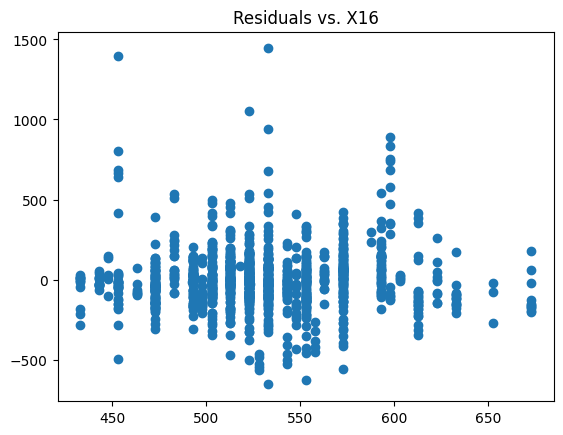

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# 假设 y 和 X 已经定义好了，X 是自变量，y 是因变量

# 拟合模型
model = sm.OLS(y, X).fit()

# 残差
residuals = model.resid

# 残差与拟合值的散点图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs. Fitted Values')

# 残差直方图
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')

plt.show()

# 正态性检验的QQ图
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# 残差与自变量的散点图，检查是否有非线性关系
X = sm.add_constant(X)  # 为非图形展示的自变量添加常数项
for i in range(X.shape[1]):
    plt.figure()
    plt.scatter(X.iloc[:, i], residuals)
    plt.title(f'Residuals vs. X{i+1}')

plt.show()

In [54]:
import statsmodels.api as sm

# 假设 y 是因变量，X 是自变量 DataFrame
# 确保 X 已经添加了常数项
X = sm.add_constant(X)  # X 现在是一个包含常数项的 DataFrame

# 拟合多元线性回归模型
model = sm.OLS(y, X).fit()

# 使用模型的残差和自变量进行 Breusch-Pagan 检验
from statsmodels.stats.diagnostic import het_breuschpagan

bp_result = het_breuschpagan(model.resid, X)
print(f"Breusch-Pagan 检验结果: {bp_result}")
"""
Breusch-Pagan 检验结果包含了四个值，它们分别代表：

统计量 (test statistic): 301.1862946178347
p 值 (p-value): 3.1685169555158675e-55
自由度 (degrees of freedom): 26.217804243076205
临界值 (critical value): 7.460123536703328e-64
在解释这些结果时，我们主要关注统计量和 p 值：

统计量：检验的统计量远大于1，这表明存在异方差性的证据。Breusch-Pagan检验的统计量是基于模型残差和预测值的比率，当存在异方差性时，这个比率的平方和会增大。

p 值：p 值非常小（远小于0.05），这意味着如果我们假设不存在异方差性（零假设），那么观察到的统计量或更极端的统计量出现的概率非常低。因此，我们有足够的证据拒绝零假设，接受存在异方差性的备择假设。

自由度和临界值通常用于与统计量进行比较，以确定是否拒绝零假设，但在这里，我们主要关注统计量和 p 值。

由于检验结果强烈表明存在异方差性，您可能需要考虑对模型进行调整。异方差性会违反普通最小二乘估计（OLS）的有效性，可能导致不准确的估计和推断。以下是一些可能的解决方案：

变换变量：对因变量或自变量进行变换，如对数变换或平方根变换，以减少异方差性。
使用稳健标准误：在模型估计中使用稳健标准误（robust standard errors），这些标准误对异方差性不敏感。
加权最小二乘法：如果异方差性的模式已知，可以使用加权最小二乘法（WLS）。

"""

Breusch-Pagan 检验结果: (301.1862946178347, 3.1685169555158675e-55, 26.217804243076205, 7.460123536703328e-64)


In [ ]:
##进一步诊断模型，以处理多元回归函数的异方差性

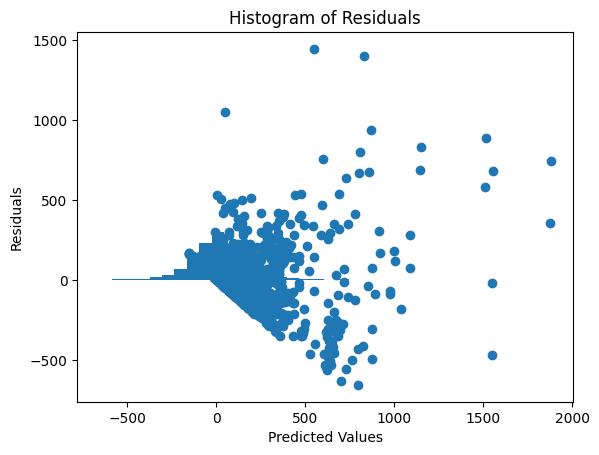

In [57]:
"""
1. 检查残差
残差图：查看残差（实际值与预测值之间的差异）是否随机分布，没有明显的模式。
直方图：检查残差分布是否对称，是否近似正态分布。
"""
import matplotlib.pyplot as plt

# 残差图
plt.scatter(model.predict(X), model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

# 残差直方图
plt.hist(model.resid, bins=30)
plt.title('Histogram of Residuals')

plt.show()

In [58]:
"""
2. 检查多重共线性
条件数：计算自变量矩阵的有条件数，如果条件数很大，表明存在多重共线性。
结果：存在很强的多重共线性
"""
# 计算条件数
condition_number = np.linalg.cond(X)
print(f"Condition number: {condition_number}")

Condition number: 958154.5967667989


In [59]:
"""
4. 检查自相关
Durbin-Watson检验：检查残差之间是否存在自相关。
结果：不存在自相关性
"""
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson检验
dw_statistic = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 1.1076662536946924


In [60]:
"""
5. 检查模型拟合度
R²和调整R²：评估模型的拟合优度。

"""
print(f"R²: {model.rsquared}")
print(f"Adjusted R²: {model.rsquared_adj}")

R²: 0.5905289122997481
Adjusted R²: 0.5854861649142771


(array([0.07408244, 0.06574485, 0.07822049, ..., 0.00226186, 0.01256948,
       0.00052562]), array([0.99999977, 0.99999991, 0.99999965, ..., 1.        , 1.        ,
       1.        ]))


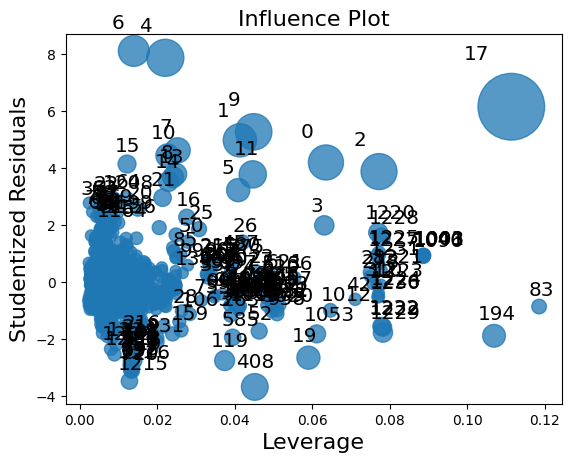

In [62]:
"""
6. 检查异常值和影响点
Cook's距离：识别可能的异常值和影响点。
"""

import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt

# 假设你已经拟合了一个 OLS 模型
# model = sm.OLS(y, X).fit()

# 使用 get_influence 方法计算影响措施，包括 Cook's 距离
influence = model.get_influence()

# Cook's 距离
cooks_distance = influence.cooks_distance

# 打印 Cook's 距离
print(cooks_distance)

# 绘制影响图，包括 Cook's 距离
# vars 参数可以是 'cooks_distance', 'hat_diag', 'resid_studentized' 等
smg.influence_plot(model, alpha=0.05, vars=['cooks_distance'])

plt.show()
"""
get_influence 方法返回一个 OLSInfluence 对象，其中包含了多种影响措施，包括 Cook's 距离。
cooks_distance 是一个数组，每个元素对应于一个观测值的 Cook's 距离。
smg.influence_plot 函数用于绘制模型的影响图，其中 alpha 参数设置图中的透明度，vars 参数指定哪些影响度量要绘制。
此外，Cook's 距离是一个衡量数据点对模型拟合影响大小的指标。一般来说，Cook's 距离较大的点可能对模型有较大的影响，
    可以被认为是影响点或潜在的异常值。在解释 Cook's 距离时，通常会有一些经验规则，
    例如一个数据点的 Cook's 距离大于 4/n（其中 n 是样本大小）时，该点可能会对模型有较大的影响。


"""

In [63]:
#9. 检查回归系数的显著性
# Wald检验
print(model.summary().tables[1])

                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            15.2630    262.393      0.058      0.954    -499.529     530.055
Metal Loading [wt.%]              1.3024      0.252      5.176      0.000       0.809       1.796
CR Metal [pm]                    -8.4008      1.876     -4.477      0.000     -12.082      -4.719
MW Support 1 [g mol-1]            2.5918      0.314      8.265      0.000       1.977       3.207
MW of Support 2 [g mol-1]         2.9208      0.297      9.820      0.000       2.337       3.504
MW Support 3 [g mol-1]            1.4830      0.364      4.073      0.000       0.769       2.197
Total MW of Support [g mol-1]    -1.7534      0.294     -5.969      0.000      -2.330      -1.177
Promoter 1 loading [wt.%]         7.5866      1.108      6.848      0.000       5.413       9.760
Promoter 2 loading [

In [64]:
"""
10. 残差正态性检验
Kolmogorov-Smirnov检验 或 Shapiro-Wilk检验：检查残差是否近似正态分布。
"""
from scipy.stats import shapiro

# Shapiro-Wilk检验
shapiro_statistic, shapiro_p_value = shapiro(model.resid)
print(f"Shapiro-Wilk statistic: {shapiro_statistic}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value}")

Shapiro-Wilk statistic: 0.8877485265067437
Shapiro-Wilk p-value: 5.181331743423129e-29


In [ ]:
"""
Breusch-Pagan 检验结果: (301.1862946178347, 3.1685169555158675e-55, 26.217804243076205, 7.460123536703328e-64)
1、输出的残差图的残差点分布从小到大呈喇叭状扩散分布
2、Condition number: 958154.5967667989
3、Durbin-Watson statistic: 1.1076662536946924
4、R²: 0.5905289122997481
Adjusted R²: 0.5854861649142771
5、cook's距离 输出了一张横坐标是leverage,纵坐标是studentized Residuals的里面有很多大小不同圆圈的图片，不懂是什么意思
6、Wald检验显著性。const 、Promoter 2 loading [wt.%]、Calcination Temperature [K] 、SBET [m2 g-1] 、Pressure [Mpa] 未通过显著性检验
7、Shapiro-Wilk statistic: 0.8877485265067437
Shapiro-Wilk p-value: 5.181331743423129e-29

结果：不存在明显的自相关性，但存在多重共线性、和异方差性、违反正态性
"""

In [74]:
#第1步：处理异方差性
#方法1：对数变换因变量
import numpy as np

# 对因变量进行对数变换
y_log = np.log(y + 1)  # +1 避免取对数时的负无穷问题

import statsmodels.api as sm

# 假设 y 是因变量，X 是自变量 DataFrame
# 确保 X 已经添加了常数项
X = sm.add_constant(X)  # X 现在是一个包含常数项的 DataFrame

# 拟合多元线性回归模型
model = sm.OLS(y_log, X).fit()

# 使用模型的残差和自变量进行 Breusch-Pagan 检验
from statsmodels.stats.diagnostic import het_breuschpagan

bp_result = het_breuschpagan(model.resid, X)
print(f"Breusch-Pagan 检验结果: {bp_result}")

"""
处理前：Breusch-Pagan 检验结果: (301.1862946178347, 3.1685169555158675e-55, 26.217804243076205, 7.460123536703328e-64)
处理后：Breusch-Pagan 检验结果: (96.49963578777053, 5.987784258566018e-14, 6.888587179832326, 1.4845408503574412e-14)
有所改善
"""

Breusch-Pagan 检验结果: (96.49963578777053, 5.987784258566018e-14, 6.888587179832326, 1.4845408503574412e-14)


In [85]:
"""
方法2:使用稳健标准误重新估计模型
稳健标准误（Robust Standard Errors）对异方差性不敏感，可以使用它们来获得更可靠的置信区间和假设检验。
它不是一个新的模型，只是在原有的模型上，用它预测会更有效。
"""
import statsmodels.api as sm

# 假设 y 是因变量，X 是自变量 DataFrame
# 确保 X 已经添加了常数项
X = sm.add_constant(X)  # 添加常数项

# 拟合多元线性回归模型
model = sm.OLS(y, X).fit()

# 打印原始标准误
print(f"Standard Errors: {model.bse}")

# 计算 HC1 稳健标准误
model_HC1_se = model_HC1_se = model.get_robustcov_results(cov_type='HC1').bse

# 打印稳健标准误 (HC1)
print(f"Robust Standard Errors (HC1): {model_HC1_se}")


import numpy as np
from scipy import stats

# 假设 model 是使用 statsmodels 拟合的 OLS 模型对象
# model.params 是参数的估计值
# model_HC1_se 是通过 model.cov_params(cov_type='HC1').diag ** 0.5 获得的 HC1 稳健标准误

# 置信区间的参数
alpha = 0.05  # 显著性水平
z_critical = stats.norm.ppf(1 - alpha / 2)  # 正态分布的临界值

# 计算置信区间
conf_lower = model.params - z_critical * model_HC1_se
conf_upper = model.params + z_critical * model_HC1_se
conf_int = np.array([conf_lower, conf_upper]).T

# 计算 t 统计量和 p 值
t_stats = model.params / model_HC1_se
df = model.nobs - model.df_model  # 自由度，nobs 是观测值的数量，df_model 是模型的自由度

# 使用 t 分布计算 p 值
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df))

# 输出结果
print(f"Confidence Interval:\n{conf_int}")
print(f"P-values: {p_values}")

Standard Errors: const                            262.392557
Metal Loading [wt.%]               0.251639
CR Metal [pm]                      1.876497
MW Support 1 [g mol-1]             0.313592
MW of Support 2 [g mol-1]          0.297426
MW Support 3 [g mol-1]             0.364137
Total MW of Support [g mol-1]      0.293748
Promoter 1 loading [wt.%]          1.107809
Promoter 2 loading [wt.%]          7.538764
Calcination Temperature [K]        0.066691
Calcination duration [h]           6.102230
SBET [m2 g-1]                      0.058276
H2/CO2 [-]                         2.917116
GHSV [cm3 h-1 gcat-1]              0.000441
Pressure [Mpa]                     1.268123
Temperature [K]                    0.142099
dtype: float64
Robust Standard Errors (HC1): [2.83598080e+02 2.49790393e-01 1.90827674e+00 3.50157927e-01
 3.46948785e-01 3.88998677e-01 3.52373526e-01 1.30657383e+00
 5.94190241e+00 6.66993110e-02 7.42522866e+00 1.16490270e-01
 5.71757018e+00 1.13076983e-03 1.06089145e+00 1.655

In [87]:
#方法3-1:尝试不同变换---平方根变换
# 假设 y 是非负数据
y_sqrt = np.sqrt(y + np.finfo(float).eps)  # 添加一个小正数以避免负无穷问题

# 拟合新的模型
model_sqrt = sm.OLS(y_sqrt, sm.add_constant(X)).fit()
print(model_sqrt.summary())

# 使用模型的残差和自变量进行 Breusch-Pagan 检验
from statsmodels.stats.diagnostic import het_breuschpagan

bp_result = het_breuschpagan(model_sqrt.resid, X)
print(f"Breusch-Pagan 检验结果: {bp_result}")

                               OLS Regression Results                              
Dep. Variable:     STY [mgMeOH h-1 gcat-1]   R-squared:                       0.558
Model:                                 OLS   Adj. R-squared:                  0.553
Method:                      Least Squares   F-statistic:                     102.5
Date:                     Sun, 05 May 2024   Prob (F-statistic):          1.82e-203
Time:                             11:02:56   Log-Likelihood:                -3771.9
No. Observations:                     1234   AIC:                             7576.
Df Residuals:                         1218   BIC:                             7658.
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [91]:
#待修改
#方法3-2:尝试不同变换---box-cox变换
#
import numpy as np
import statsmodels.api as sm
from scipy import stats

# 假设 y 是一个一维的 NumPy 数组，只包含正值
# 假设 X 是一个二维的 NumPy 数组或 pandas DataFrame，包含自变量

# 确保 y 是一维数组
y = np.array(y).ravel()

# Box-Cox 变换
lambda_bc, y_boxcox = stats.boxcox(y)

# 如果 y_boxcox 是标量，将其转换为一维数组
if np.isscalar(y_boxcox):
    y_boxcox = np.array([0])  # 这里只是示例，通常需要其他处理方式

# 确保 y_boxcox 是一维数组
y_boxcox = np.atleast_1d(y_boxcox)

# 添加常数项到 X 并拟合新的模型
X_with_const = sm.add_constant(X)
model_boxcox = sm.OLS(y_boxcox, X_with_const).fit()

# 打印模型摘要
print(model_boxcox.summary())

ValueError: endog and exog matrices are different sizes

In [94]:
#方法3-2:使用加权最小二乘法 (WLS)
# 假设我们使用残差的标准差作为权重
weights = 1 / np.std(model.resid)

# 拟合加权最小二乘模型
model_wls = sm.WLS(y, sm.add_constant(X), weights=weights).fit()
print(model_wls.summary())

#效果一般

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            WLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sun, 05 May 2024   Prob (F-statistic):          1.60e-223
Time:                        11:12:31   Log-Likelihood:                -8176.3
No. Observations:                1234   AIC:                         1.638e+04
Df Residuals:                    1218   BIC:                         1.647e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [96]:
##第2步：处理多重共线性
#方法1:中心化自变量
# 中心化自变量，即从每个自变量减去其均值
X_centered = X.apply(lambda x: x - x.mean(), axis=0)

# 重新拟合最小二乘模型
model_wls = sm.WLS(y, X_centered).fit()
print(model_wls.summary())

#多重共线性处理后，效果反而更差了

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.405
Model:                            WLS   Adj. R-squared (uncentered):              0.397
Method:                 Least Squares   F-statistic:                              55.24
Date:                Sun, 05 May 2024   Prob (F-statistic):                   1.03e-125
Time:                        11:16:36   Log-Likelihood:                         -8640.4
No. Observations:                1234   AIC:                                  1.731e+04
Df Residuals:                    1219   BIC:                                  1.739e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/Users/sunqian/anaconda3/envs/practice/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [98]:
##第2步：处理多重共线性
#方法2:使用岭回归
from sklearn.linear_model import Ridge
import statsmodels.api as sm

#  X 已经通过 sm.add_constant() 添加了常数项
# model 是通过 scikit-learn 的 Ridge 拟合的模型对象

# 使用 scikit-learn 的 Ridge 拟合模型
ridge_model = Ridge(alpha=1.0)  # alpha 是岭回归的正则化参数
ridge_model.fit(X, y)

# 获取回归系数
ridge_coef = ridge_model.coef_

# 获取截距项
ridge_intercept = ridge_model.intercept_

print(f"Ridge Regression Coefficients: {ridge_coef}")
print(f"Ridge Regression Intercept: {ridge_intercept}")

# 如果您需要类似 statsmodels 的摘要格式，可以使用 statsmodels 的 Ridge 模型
ridge_sm = sm.OLS(y, X).fit(cov_type='HC1', use_t=False)
print(ridge_sm.summary())


#效果好一些

Ridge Regression Coefficients: [ 0.00000000e+00  1.30239112e+00 -8.40096537e+00  2.59167351e+00
  2.92081126e+00  1.48296367e+00 -1.75333144e+00  7.58608360e+00
 -1.76239956e+01  1.15834159e-01  2.34985827e+01  2.76360875e-02
  3.25649995e+01  1.42870779e-02  1.11708774e+00  1.30747656e+00]
Ridge Regression Intercept: 15.449841956595662
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     45.89
Date:                Sun, 05 May 2024   Prob (F-statistic):          3.05e-107
Time:                        11:21:44   Log-Likelihood:                -8176.3
No. Observations:                1234   AIC:                         1.638e+04
Df Residuals:                    1218   BIC:                         1.647e+04
Df Model:                    

In [100]:
#第3步：重新评估模型中的变量---逐步回归；删除'SBET [m2 g-1]'、Pressure [Mpa]、'const'、Calcination Temperature [K]
#！！！最后得出的 Adj. R-squared (uncentered):0.716；
#基本可以判定对于STY（Space Time Yield）: 甲醇产率与SBET (m2 g-1): 比表面积、Pressure (Mpa): 压力、Calcination Temperature (K): 焙烧温度不显著线性相关；
#猜测：这些不相关的变量与物质
#  'SBET [m2 g-1] ' 是不显著的变量
X_with_const.drop(columns=['SBET [m2 g-1]'], inplace=True)

In [101]:
model_reduced = sm.OLS(y, X_with_const).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     125.5
Date:                Sun, 05 May 2024   Prob (F-statistic):          1.57e-224
Time:                        12:01:34   Log-Likelihood:                -8176.4
No. Observations:                1234   AIC:                         1.638e+04
Df Residuals:                    1219   BIC:                         1.646e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [102]:
#  'Pressure [Mpa]' 是不显著的变量
X_with_const.drop(columns=['Pressure [Mpa]'], inplace=True)

In [103]:
model_reduced = sm.OLS(y, X_with_const).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     135.1
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.03e-225
Time:                        12:02:23   Log-Likelihood:                -8176.9
No. Observations:                1234   AIC:                         1.638e+04
Df Residuals:                    1220   BIC:                         1.645e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [104]:
#  'const ' 是不显著的变量
X_with_const.drop(columns=['const'], inplace=True)

In [105]:
model_reduced = sm.OLS(y, X_with_const).fit()
print(model_reduced.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              240.5
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        12:02:59   Log-Likelihood:                         -8176.9
No. Observations:                1234   AIC:                                  1.638e+04
Df Residuals:                    1221   BIC:                                  1.645e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [106]:
#  'Calcination Temperature [K]' 是不显著的变量
X_with_const.drop(columns=['Calcination Temperature [K]'], inplace=True)

In [108]:
model_reduced = sm.OLS(y, X_with_const).fit()
print(model_reduced.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              259.7
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        12:06:04   Log-Likelihood:                         -8178.6
No. Observations:                1234   AIC:                                  1.638e+04
Df Residuals:                    1222   BIC:                                  1.644e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [126]:
#第4步：改善残差的正态性
#方法1：变换因变量或残差--上面已实验过
#方法2:检查数据中的异常值

import pandas as pd
import numpy as np

# 假设 X_with_const 是您的 DataFrame，且已经包含了一个常数项

# 定义一个函数来识别异常值
def detect_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (factor * IQR)
    upper_bound = Q3 + (factor * IQR)
    return lower_bound, upper_bound

# 遍历所有列，检测异常值
for col in X_with_const.columns:
    lower, upper = detect_outliers_iqr(X_with_const, col)
    # 标记异常值
    X_with_const[f'{col}_outliers'] = X_with_const.apply(
        lambda row: row[col] < lower or row[col] > upper,
        axis=1
    )
    
# 打印结果，查看异常值
print(X_with_const)




      Metal Loading [wt.%]  CR Metal [pm]  MW Support 1 [g mol-1]  \
0                      4.4            144                  159.69   
1                      4.4            144                  159.69   
2                     36.5            138                   81.38   
3                      4.4            144                  159.69   
4                     36.5            138                   81.38   
...                    ...            ...                     ...   
1229                  67.0            138                   81.38   
1230                  67.0            138                   81.38   
1231                  67.0            138                   81.38   
1232                  67.0            138                   81.38   
1233                 100.0            140                    0.00   

      MW of Support 2 [g mol-1]  MW Support 3 [g mol-1]  \
0                          0.00                     0.0   
1                          0.00                     0

In [125]:
# 查看数据类型和缺失值
print(X_with_const.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Metal Loading [wt.%]           1234 non-null   float64
 1   CR Metal [pm]                  1234 non-null   int64  
 2   MW Support 1 [g mol-1]         1234 non-null   float64
 3   MW of Support 2 [g mol-1]      1234 non-null   float64
 4   MW Support 3 [g mol-1]         1234 non-null   float64
 5   Total MW of Support [g mol-1]  1234 non-null   float64
 6   Promoter 1 loading [wt.%]      1234 non-null   float64
 7   Promoter 2 loading [wt.%]      1234 non-null   float64
 8   Calcination duration [h]       1234 non-null   float64
 9   H2/CO2 [-]                     1234 non-null   float64
 10  GHSV [cm3 h-1 gcat-1]          1234 non-null   float64
 11  Temperature [K]                1234 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 115.8 KB


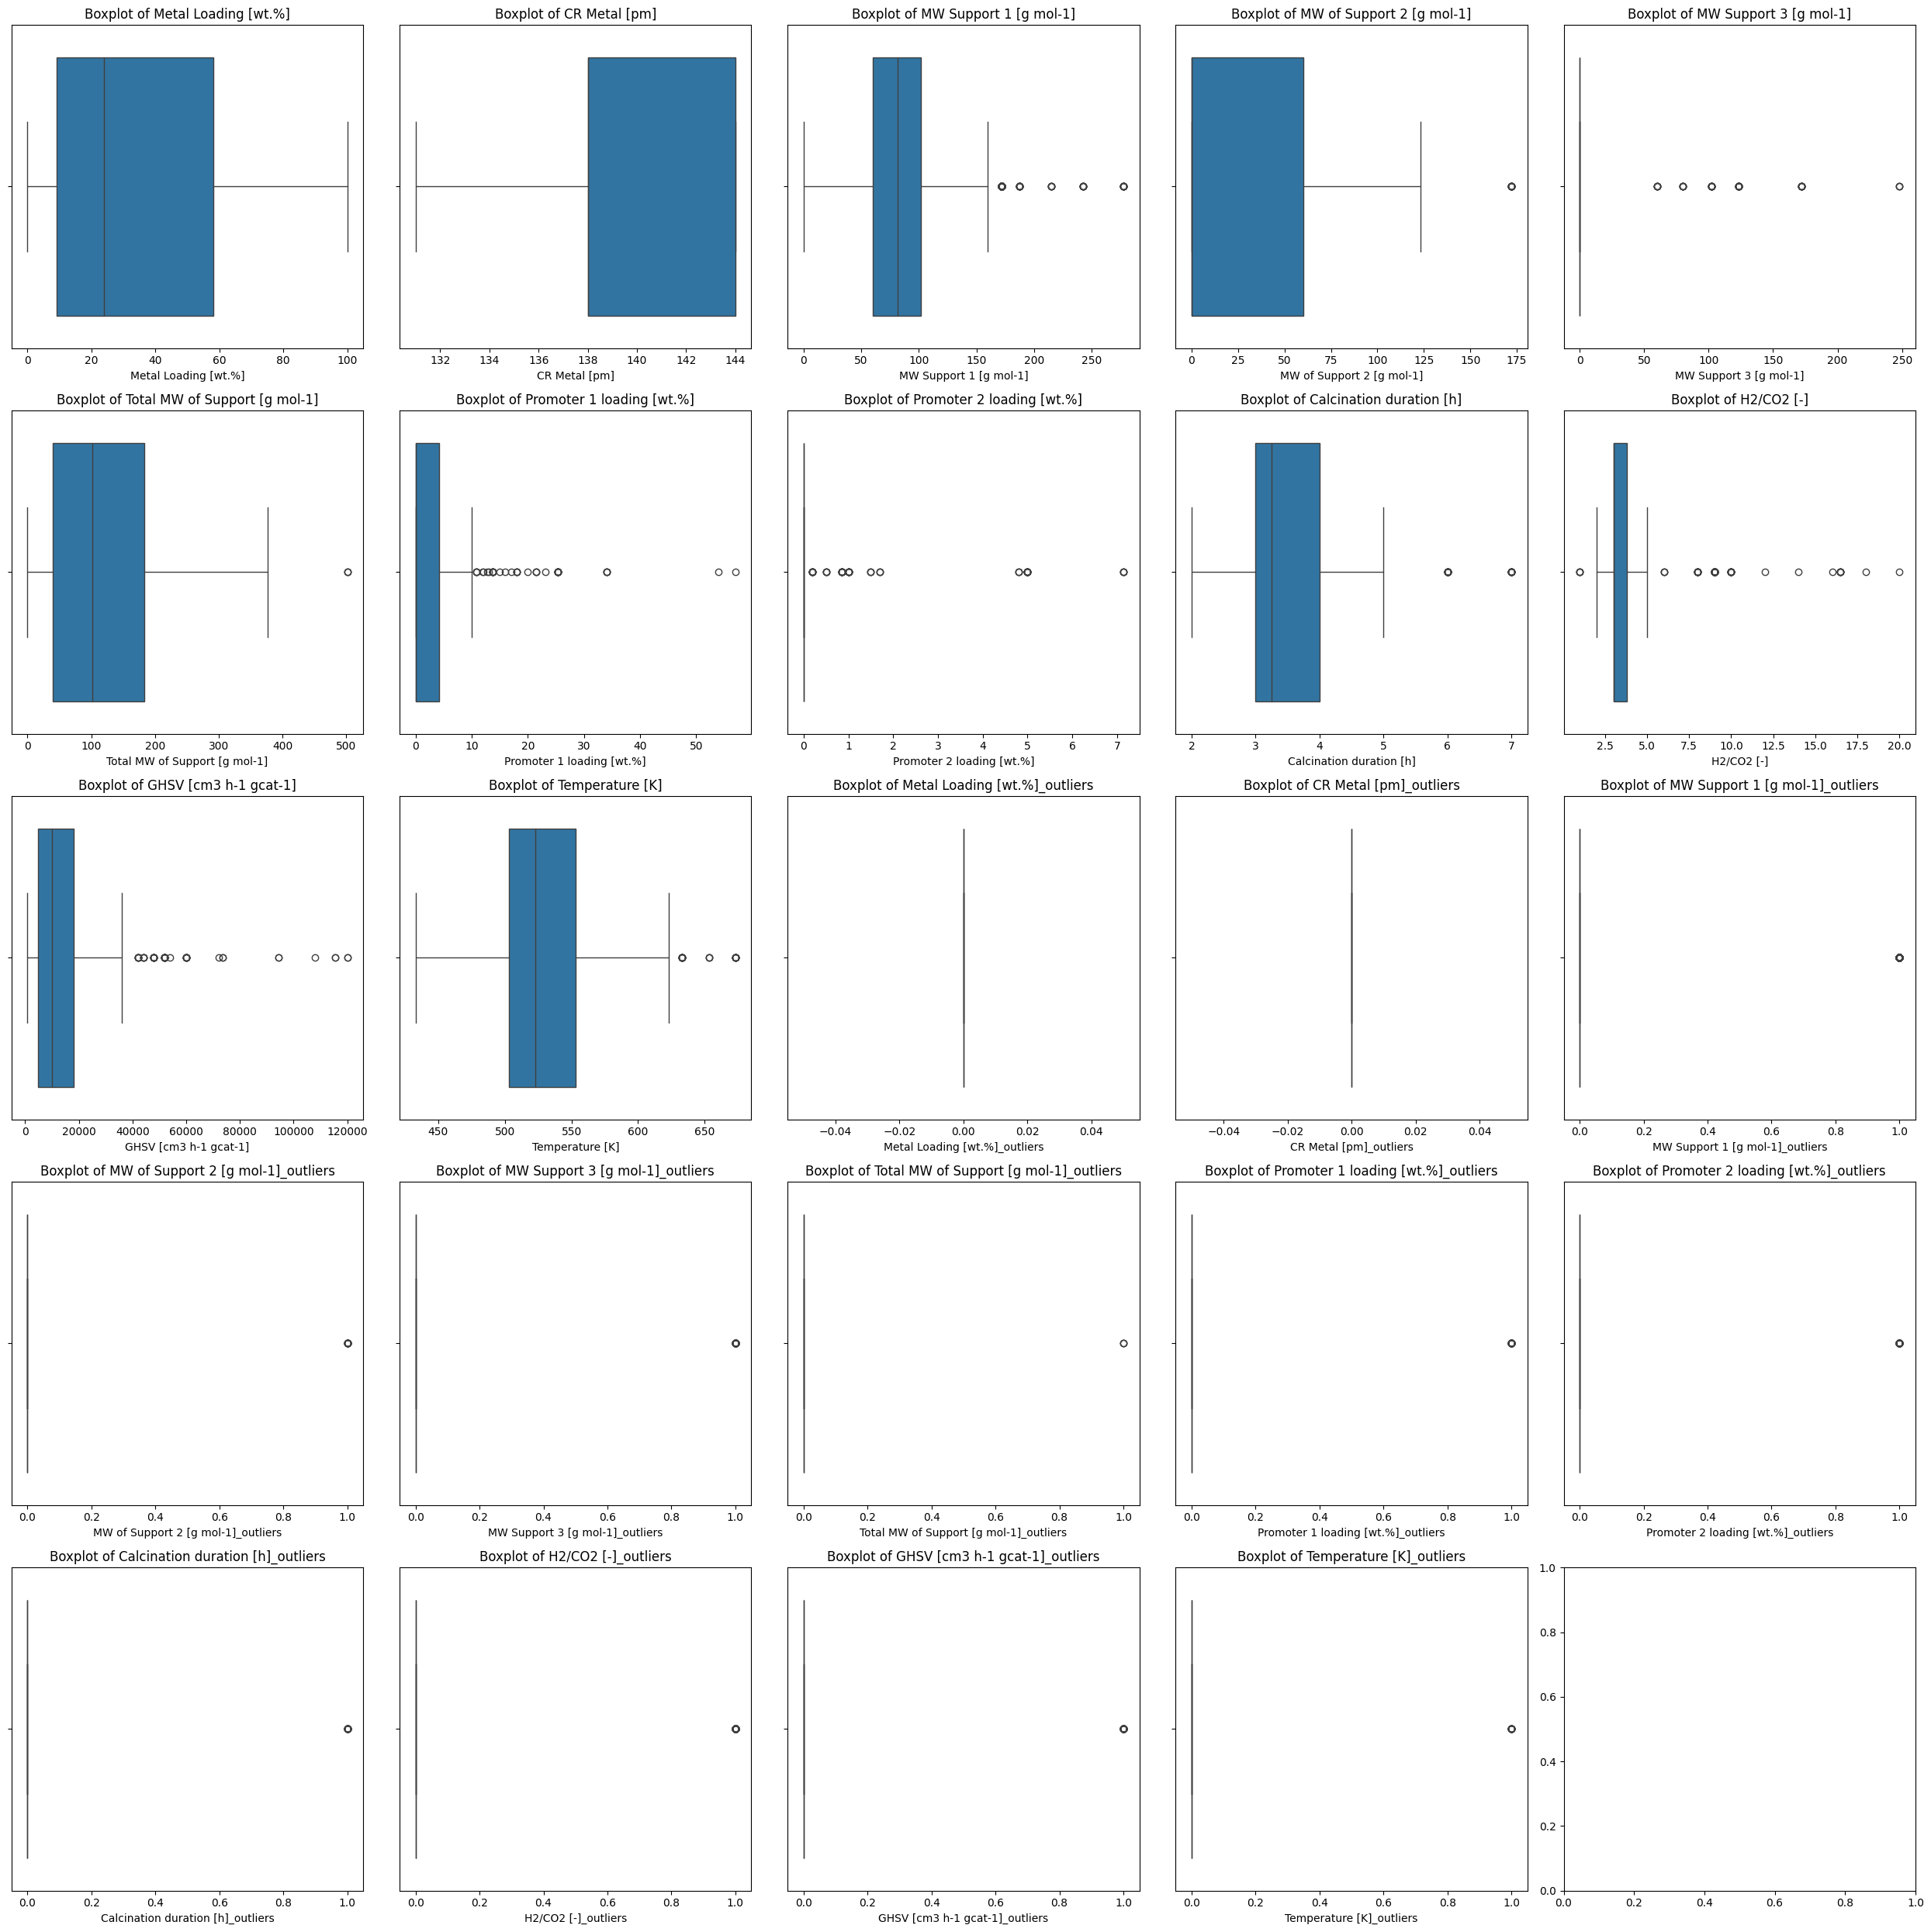

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 X_with_const 是您的 DataFrame，其中只包含数值型列

# 获取列名
columns = X_with_const.columns

# 计算所需的子图布局，例如，如果有 5 列，可以创建 1 行 5 列的子图
n_cols = 5  # 可以根据需要调整，以确保图形不会太拥挤
n_rows = (len(columns) + n_cols - 1) // n_cols  # 自动计算行数

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# 绘制每个变量的箱线图
for i, col in enumerate(columns):
    ax = axes[i // n_cols, i % n_cols]  # 根据行列定位子图
    sns.boxplot(x=X_with_const[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')

# 调整子图间距
plt.tight_layout()
plt.show()

In [130]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 y_log 和 X_with_const 已经是数值型数据
# 如果它们是 pandas Series 或 DataFrame，使用 np.asarray 确保它们是 numpy 数组
y_log = np.asarray(y_log)
X_with_const = np.asarray(X_with_const)

# 拟合新的模型
model_new = sm.OLS(y_log, X_with_const).fit()

# 检查残差直方图
plt.figure(figsize=(8, 6))
sns.histplot(model_new.resid, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# 检查QQ图
sm.qqplot(model_new.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''